## Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Iris Dataset

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X = iris['data']
y = iris['target']
X.shape, y.shape

((150, 4), (150,))

In [7]:
X = StandardScaler().fit_transform(X)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
pc.shape

(150, 2)

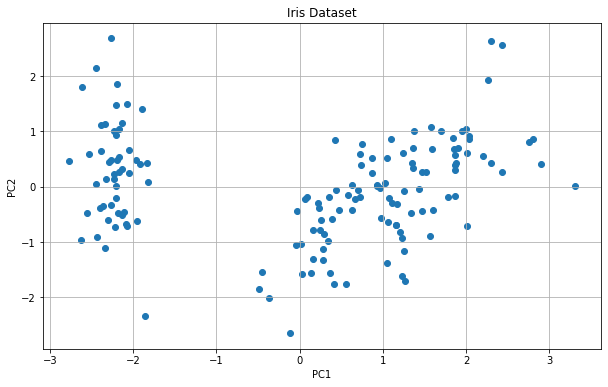

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(pc[:,0], pc[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Dataset')
plt.grid()
plt.show()

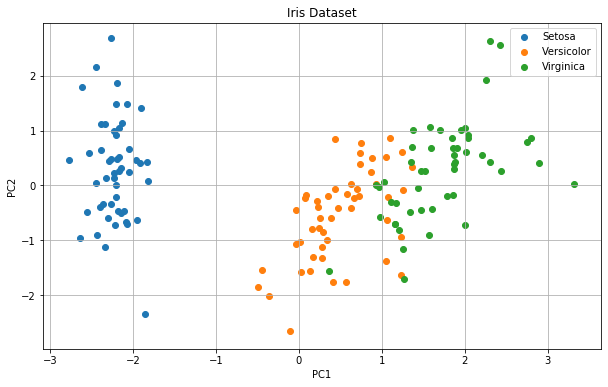

In [31]:
plt.figure(figsize=(10,6))

[plt.scatter(pc[y==i,0], pc[y==i,1], label=classe.title())\
 for i, classe in enumerate(iris.target_names)]
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Dataset')
plt.legend()
plt.grid()
plt.show()

In [32]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [33]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

### Digits Dataset

In [34]:
digitos = datasets.load_digits()
X = digitos['data']
y = digitos['target']
X.shape, y.shape

((1797, 64), (1797,))

In [40]:
digitos['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

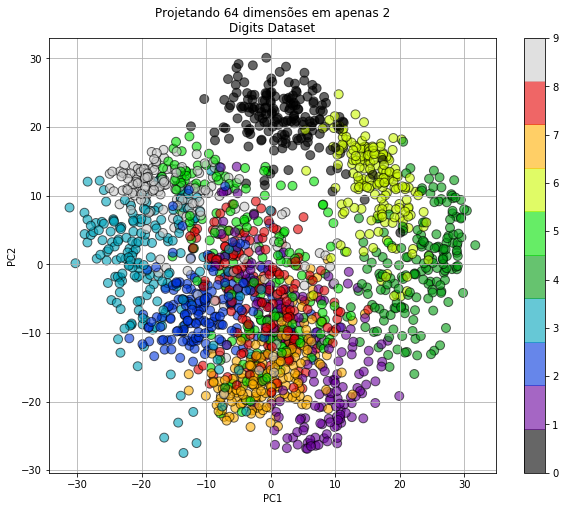

In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor='black', alpha=0.6, s=80,
           cmap=plt.cm.get_cmap('nipy_spectral',len(digitos.target_names)))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Projetando {X.shape[1]} dimensões em apenas 2\nDigits Dataset')
plt.colorbar()
plt.grid()
plt.show()

## TSNE

In [59]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=123)


X_tsne = tsne.fit_transform(X)
X_tsne.shape

(1797, 2)

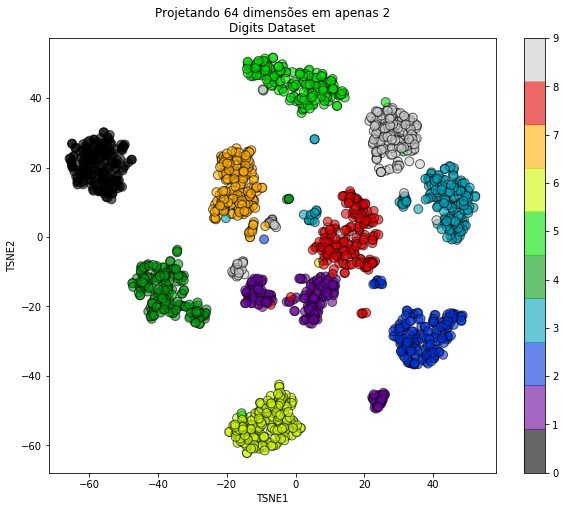

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, edgecolor='black', alpha=0.6, s=80,
           cmap=plt.cm.get_cmap('nipy_spectral',len(digitos.target_names)))
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title(f'Projetando {X.shape[1]} dimensões em apenas 2\nDigits Dataset')
plt.colorbar()
plt.show()

In [63]:
X.shape

(1797, 64)

In [73]:
pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

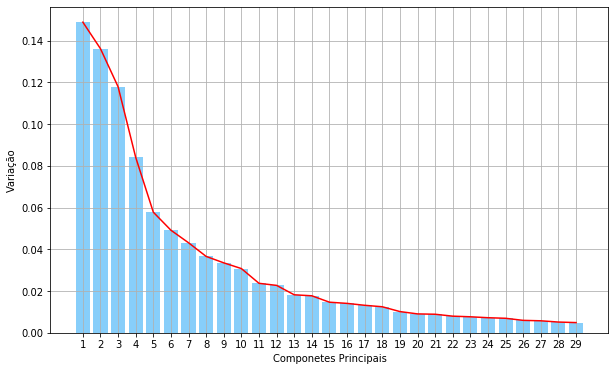

In [126]:
plt.figure(figsize=(10,6)).add_subplot(111)

plt.bar(range(1, pca.n_components_+1),
       pca.explained_variance_ratio_[:pca.n_components_],
       color='lightskyblue')

plt.plot(range(1, pca.n_components_+1),
       pca.explained_variance_ratio_[:pca.n_components_],
       color='red')

plt.xlabel('Componetes Principais')
plt.ylabel('Variação')
plt.xticks(range(1, pca.n_components_+1))

plt.grid()
plt.show()